In [1]:
#importing the libraries for data processing and modelling
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,auc,classification_report,confusion_matrix,accuracy_score,fbeta_score
from sklearn import metrics

#algorithmns libraries import command
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#importing the data
names=['status_of_exst_checking_acnt',
      'duration_mth', 'credit_hist', 'purpose', 'credit_amnt', 'savings_acnt', 'employment_since',
      'instal_rate', 'status', 'oth_gurantors', 'prsnt_res_since', 'property', 'age', 'oth_plans',
      'housing', 'num_exst_credit', 'job', 'num_liable', 'tele', 'foreign_wrkr', 'target']
df = pd.read_csv(r'/Users/akash/Desktop/Notebooks/vmw/data/german.data', delimiter=" ", header=None, names=names)

In [3]:
df.head()

,status_of_exst_checking_acnt,duration_mth,credit_hist,purpose,credit_amnt,savings_acnt,employment_since,instal_rate,status,oth_gurantors,...,property,age,oth_plans,housing,num_exst_credit,job,num_liable,tele,foreign_wrkr,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
#encoding the target variable as 0 (bad) and 1 (good)
d = {1 : 0,
2 : 1}

df.replace({'target': d}, inplace=True)
df.head()

,status_of_exst_checking_acnt,duration_mth,credit_hist,purpose,credit_amnt,savings_acnt,employment_since,instal_rate,status,oth_gurantors,...,property,age,oth_plans,housing,num_exst_credit,job,num_liable,tele,foreign_wrkr,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [5]:
'''
selecting the significant features received from the 'CreditWorthinessClassification_EDA.ipynb' notebook for 
model building
'''

lst = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
significant_column_lst = []
for i,col in enumerate(lst):
    if col==1:
        significant_column_lst.append(df.columns[i])

In [6]:
significant_column_lst

['status_of_exst_checking_acnt',
 'duration_mth',
 'credit_hist',
 'purpose',
 'credit_amnt',
 'savings_acnt',
 'employment_since',
 'instal_rate',
 'status',
 'oth_gurantors',
 'property',
 'age',
 'oth_plans',
 'housing',
 'foreign_wrkr']

In [7]:
#one hot encoding the categorical columns using pd.get_dummies()
df_ofe = pd.get_dummies(df)

In [8]:
df_ofe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   duration_mth                      1000 non-null   int64
 1   credit_amnt                       1000 non-null   int64
 2   instal_rate                       1000 non-null   int64
 3   prsnt_res_since                   1000 non-null   int64
 4   age                               1000 non-null   int64
 5   num_exst_credit                   1000 non-null   int64
 6   num_liable                        1000 non-null   int64
 7   target                            1000 non-null   int64
 8   status_of_exst_checking_acnt_A11  1000 non-null   uint8
 9   status_of_exst_checking_acnt_A12  1000 non-null   uint8
 10  status_of_exst_checking_acnt_A13  1000 non-null   uint8
 11  status_of_exst_checking_acnt_A14  1000 non-null   uint8
 12  credit_hist_A30                   1

In [ ]:
#dropping columns to avoid dummy variable trap
df_ofe.drop(columns=['status_of_exst_checking_acnt_A14','credit_hist_A34','purpose_A410','savings_acnt_A65',
                    'employment_since_A75','status_A94','oth_gurantors_A103','property_A124','oth_plans_A143',
                    'housing_A153','job_A174','tele_A192','foreign_wrkr_A202'], inplace=True)

### Train test split

In [9]:
#X and y variables
X = df_ofe.drop('target', axis=1).values
y = df_ofe["target"].values

#spliting X and y into train and test values for model training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

### Different prediction algorithms to predict credit worthiness of customers

LR: 0.769918 (0.053101)
KNN: 0.546494 (0.073553)
CART: 0.578603 (0.054164)
RF: 0.774180 (0.049422)


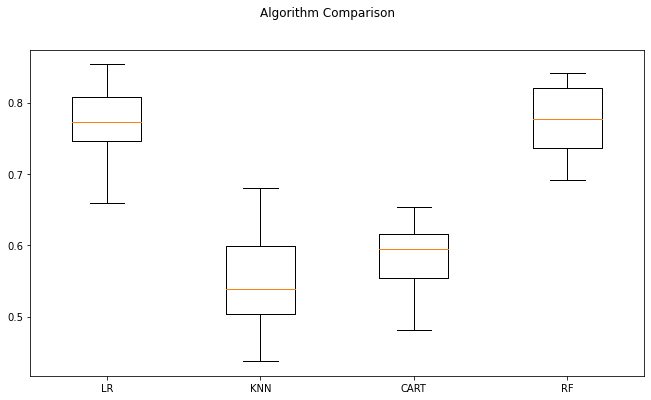

In [10]:
#setting seed to get the similar results when the model is run again
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Since Random Forest model has the best performance with minimum std. deviation on mutiple folds, and its ability to remain in sensitive to outliers. It is chosen for building the prediction model. 

### Hyper parameter tuning for the random forest model

In [11]:
#seting the hyper-parameters for tuning the model
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#creating the classifier
model = RandomForestClassifier(random_state=seed)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=4)
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.706, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.707, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.733, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.717, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.772, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.686, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.787, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.792, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.723, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.760, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.778, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.806, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.781, total=   0.0s
[CV] max_depth=3, max

[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.761, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.772, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.755, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.728, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.768, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.765, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.769, total=   0.0s
[CV] max_depth

[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.754, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.755, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.751, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.764, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.755, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.766, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.765, total=   0.0s
[CV] max_depth=5, max

[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.741, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=10 ...................
[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.728, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=10 ...................
[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.766, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=10 ...................
[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.758, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.782, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.747, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.743, total=   0.0s
[CV] max_depth

[CV]  max_depth=7, max_features=4, n_estimators=10, score=0.752, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=10 ....................
[CV]  max_depth=7, max_features=4, n_estimators=10, score=0.758, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=10 ....................
[CV]  max_depth=7, max_features=4, n_estimators=10, score=0.704, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=10 ....................
[CV]  max_depth=7, max_features=4, n_estimators=10, score=0.748, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=10 ....................
[CV]  max_depth=7, max_features=4, n_estimators=10, score=0.742, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.776, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.728, total=   0.0s
[CV] max_depth=7, max

[CV]  max_depth=7, max_features=15, n_estimators=10, score=0.774, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=10 ...................
[CV]  max_depth=7, max_features=15, n_estimators=10, score=0.740, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=10 ...................
[CV]  max_depth=7, max_features=15, n_estimators=10, score=0.724, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=10 ...................
[CV]  max_depth=7, max_features=15, n_estimators=10, score=0.772, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=10 ...................
[CV]  max_depth=7, max_features=15, n_estimators=10, score=0.743, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.802, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.744, total=   0.0s
[CV] max_depth

[CV]  max_depth=10, max_features=4, n_estimators=25, score=0.774, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.775, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.739, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.777, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.793, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.788, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=150 ..................
[CV]  max_depth=10, max_features=4, n_estimators=150, score=0.791, total=   0.1s
[CV] max_dept

[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.747, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.768, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.795, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.789, total=   0.1s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.725, total=   0.1s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.782, total=   0.1s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.789, total=   0.1s
[CV] ma

[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.759, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.699, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.779, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.738, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.772, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.762, total=   0.1s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.739, total=   0.1s


[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.761, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.761, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.776, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.727, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.783, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.779, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.775, total= 

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   24.4s finished


In [34]:
rf = RandomForestClassifier(max_depth=7, max_features=4, n_estimators=150, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=4, n_estimators=150,
                       random_state=2)

### Important Feature

In [35]:
X_temp = df_ofe.drop('target', axis=1)
feature_imp = pd.DataFrame({"var":X_temp.columns,"importance":rf.feature_importances_}).sort_values(["importance"],ascending=False)
feature_imp.reset_index(drop=True).head(15)

,var,importance
0,status_of_exst_checking_acnt_A14,0.081195
1,credit_amnt,0.079534
2,duration_mth,0.074997
3,age,0.059347
4,status_of_exst_checking_acnt_A11,0.050494
5,instal_rate,0.030362
6,savings_acnt_A61,0.029393
7,oth_plans_A141,0.026282
8,credit_hist_A34,0.024586
9,housing_A152,0.023779


### Plotting ROC-AUC Curve for the best fitted model

In [36]:
def auc_plot_rf(X,y):
    y_pred_proba = rf.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
    auc = metrics.roc_auc_score(y, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

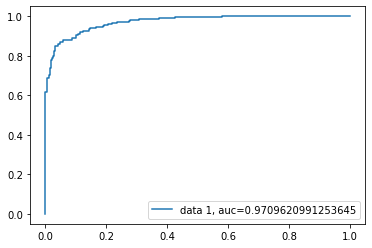

In [37]:
auc_plot_rf(X_train,y_train)

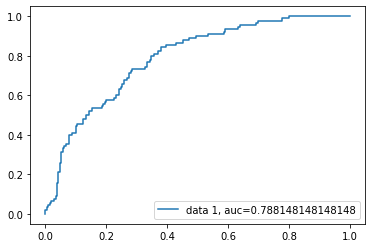

In [38]:
auc_plot_rf(X_test,y_test)

### Finding optimal threshold to classify good/bad customer

Area under the ROC curve : 0.970962
         fpr       tpr     1-fpr        tf  thresholds
44  0.102041  0.904762  0.897959  0.006803     0.33434


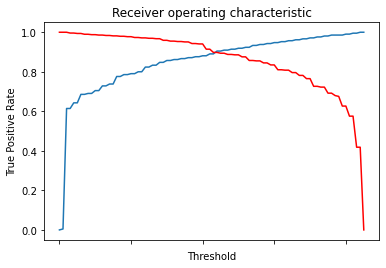

In [39]:
predictions_train = rf.predict_proba(X_train)
predictions_test = rf.predict_proba(X_test)

p_train = pd.DataFrame(predictions_train)
p_test = pd.DataFrame(predictions_test)

#finding the optimal threshold
fpr, tpr, thresholds =roc_curve(y_train, predictions_train[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print(roc.iloc[(roc.tf-0).abs().argsort()[:1]])

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('Threshold')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])
plt.show()

### Results and Evaluation

In [40]:
threshold = roc.iloc[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
p_train['Pred'] = np.where(p_train[1]>=threshold,1,0)
p_test['Pred'] = np.where(p_test[1]>=threshold,1,0)

In [41]:
#train confusion matrix
conf_train = pd.DataFrame(confusion_matrix(y_train,p_train['Pred']))  
print(confusion_matrix(y_train,p_train['Pred']))
print(classification_report(y_train,p_train['Pred']))  
print(accuracy_score(y_train,p_train['Pred']))

[[440  50]
 [ 20 190]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       490
           1       0.79      0.90      0.84       210

    accuracy                           0.90       700
   macro avg       0.87      0.90      0.89       700
weighted avg       0.91      0.90      0.90       700

0.9


In [42]:
#test confusion matrix
conf = pd.DataFrame(confusion_matrix(y_test,p_test['Pred']))  
print(confusion_matrix(y_test,p_test['Pred']))
print(classification_report(y_test,p_test['Pred']))  
print(accuracy_score(y_test, p_test['Pred']))

[[152  58]
 [ 26  64]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       210
           1       0.52      0.71      0.60        90

    accuracy                           0.72       300
   macro avg       0.69      0.72      0.69       300
weighted avg       0.76      0.72      0.73       300

0.72


In [43]:
#Calculating KS
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [44]:
y_train = pd.DataFrame(y_train)
y_train.reset_index(inplace=True, drop=True)
train_result = pd.concat([y_train,p_train[1]],axis=1,ignore_index=True)
train_result.rename(columns = {0: "target",1:"prob"},inplace = True)
train_result

,target,prob
0,1,0.472555
1,0,0.241684
2,1,0.397974
3,0,0.304654
4,0,0.140446
...,...,...
695,1,0.315261
696,1,0.310696
697,0,0.160608
698,0,0.293343


In [45]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace=True, drop=True)
test_result = pd.concat([y_test,p_test[1]],axis=1,ignore_index=True)
test_result.rename(columns = {0: "target",1:"prob"},inplace = True)
test_result

,target,prob
0,0,0.133764
1,0,0.308802
2,0,0.319290
3,0,0.170960
4,0,0.294970
...,...,...
295,1,0.299895
296,1,0.153527
297,0,0.120713
298,0,0.196860


In [46]:
#KS Table for in time training (70% data)
train_df = pd.DataFrame(data={'Actual':train_result['target'], 'Prob':train_result['prob']})
train_ks = ks(data=train_df,target="Actual", prob="Prob")
train_ks

KS is 81.6% at decile 3


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.547658,0.745438,70,0,33.33%,0.00%,33.33%,0.00%,33.3
2,0.451965,0.546348,67,3,31.90%,0.61%,65.24%,0.61%,64.6
3,0.368826,0.450820,46,24,21.90%,4.90%,87.14%,5.51%,81.6
4,0.308540,0.368723,16,54,7.62%,11.02%,94.76%,16.53%,78.2
5,0.264476,0.308315,7,63,3.33%,12.86%,98.10%,29.39%,68.7
6,0.226617,0.263578,3,67,1.43%,13.67%,99.52%,43.06%,56.5
7,0.185611,0.225033,0,70,0.00%,14.29%,99.52%,57.35%,42.2
8,0.147963,0.184963,1,69,0.48%,14.08%,100.00%,71.43%,28.6
9,0.119813,0.147891,0,70,0.00%,14.29%,100.00%,85.71%,14.3


In [48]:
#KS Table for in time testing (30% data)
test_df = pd.DataFrame(data={'Actual':test_result['target'], 'Prob':test_result['prob']})
test_ks = ks(data=test_df,target="Actual", prob="Prob")
test_ks

KS is 44.4% at decile 5


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.483109,0.635936,20,10,22.22%,4.76%,22.22%,4.76%,17.5
2,0.417891,0.479308,19,11,21.11%,5.24%,43.33%,10.00%,33.3
3,0.378163,0.417341,11,19,12.22%,9.05%,55.56%,19.05%,36.5
4,0.335987,0.377692,12,18,13.33%,8.57%,68.89%,27.62%,41.3
5,0.302718,0.334963,11,19,12.22%,9.05%,81.11%,36.67%,44.4
6,0.250947,0.302596,7,23,7.78%,10.95%,88.89%,47.62%,41.3
7,0.215327,0.250262,4,26,4.44%,12.38%,93.33%,60.00%,33.3
8,0.183897,0.215109,4,26,4.44%,12.38%,97.78%,72.38%,25.4
9,0.140331,0.183141,2,28,2.22%,13.33%,100.00%,85.71%,14.3


In [49]:
#reused code for plotting lift, cumulative gain and ks chart from github.
def Rank_Order(Probab,Actual):

    y="Probab"
    Target= "Target"
    df = pd.DataFrame()
    df[y] = Probab
    df[Target] = Actual
    
    df.sort_values(y, ascending=False,inplace=True)
    df['decile']=np.linspace(1, 11, len(df), False, dtype=int)

    Rank=df.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt_cust","cnt_resp","cnt_non_resp"])
        )).reset_index()
    
    tmp=df[['Target']].sort_values('Target', ascending=False)
    tmp['declile']=np.linspace(1, 11, len(tmp), False, dtype=int)
    Rank['cnt_resp_wiz']=tmp.groupby('declile',as_index=False)['Target'].sum()['Target']
    
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt_cust"],2)
    Rank["cum_cust"]=np.cumsum(Rank["cnt_cust"])
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank['cum_resp_wiz']=np.cumsum(Rank["cnt_resp_wiz"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_cust_pct"]=round(Rank["cum_cust"]*100/np.sum(Rank["cnt_cust"]),2)
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_resp_pct_wiz"]=round(Rank["cum_resp_wiz"]*100/np.sum(Rank["cnt_resp_wiz"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank["Lift"] = round(Rank["cum_resp_pct"] / Rank["cum_cust_pct"],2)
    
    fig = plt.figure(figsize=(16, 5))

    # Lift Chart
    plt.subplot(1,3,1)
    plt.plot(Rank.decile.values,Rank.Lift.values, marker='o',label='Model')
    plt.plot([1,10],[1,1], 'k--',marker='o',label='Random')
    plt.title('Lift Chart', fontsize=14)
    plt.xlabel('Deciles', fontsize=14)
    plt.ylabel('% Resonders', fontsize=14)
    plt.legend()
    plt.grid(True)

    # Cummulitive Gains Chart
    plt.subplot(1,3,2)
    plt.plot(np.append(0,Rank.decile.values),np.append(0,Rank.cum_resp_pct.values), marker='o',label='Model')
    plt.plot(np.append(0,Rank.decile.values),np.append(0,Rank.cum_resp_pct_wiz.values), 'c--',label='Wizard')
    plt.plot([0,10],[0,100], 'k--',marker='o',label='Random')
    plt.title('Cumm Gain Chart', fontsize=14)
    plt.xlabel('Deciles', fontsize=14)
    plt.ylabel('% Resonders', fontsize=14)
    plt.legend()
    plt.grid(True)
    
    # KS Statistic Chart
    plt.subplot(1,3,3)
    plt.plot(np.append(0,Rank.decile.values),np.append(0,Rank.cum_resp_pct.values), 
             marker='o',label='Responders')
    plt.plot(np.append(0,Rank.decile.values),np.append(0,Rank.cum_non_resp_pct.values), 
             marker='o',label='Non-Responders')
    ksmx = Rank.KS.max()
    ksdcl=Rank[Rank.KS==ksmx].decile.values
    plt.plot( [ksdcl,ksdcl],
            [Rank[Rank.KS==ksmx].cum_resp_pct.values,
             Rank[Rank.KS==ksmx].cum_non_resp_pct.values],
             'g--',marker='o',label='KS Statisic: '+str(ksmx)+' at decile '+str(list(ksdcl)[0]))
    plt.title('KS Chart', fontsize=14)
    plt.xlabel('Deciles', fontsize=14)
    plt.ylabel('% Resonders', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return(Rank)

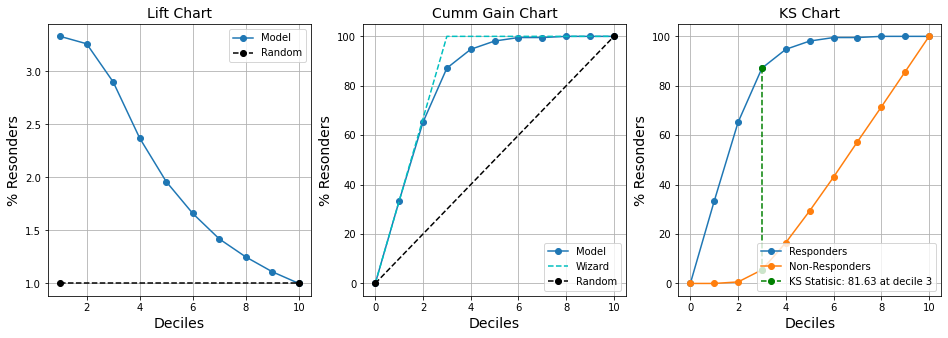

,decile,min_prob,max_prob,avg_prob,...,cum_resp_pct_wiz,cum_non_resp_pct,KS,Lift
0,1,0.547658,0.745438,0.616860,...,33.33,0.00,33.33,3.33
1,2,0.451965,0.546348,0.495230,...,66.67,0.61,64.63,3.26
2,3,0.368826,0.450820,0.411334,...,100.00,5.51,81.63,2.90
3,4,0.308540,0.368723,0.333262,...,100.00,16.53,78.23,2.37
4,5,0.264476,0.308315,0.287135,...,100.00,29.39,68.71,1.96
5,6,0.226617,0.263578,0.244902,...,100.00,43.06,56.46,1.66
6,7,0.185611,0.225033,0.204990,...,100.00,57.35,42.17,1.42
7,8,0.147963,0.184963,0.164614,...,100.00,71.43,28.57,1.25
8,9,0.119813,0.147891,0.133765,...,100.00,85.71,14.29,1.11
9,10,0.059182,0.119661,0.097354,...,100.00,100.00,0.00,1.00


In [50]:
Rank_Order(train_result['prob'],train_result['target'])

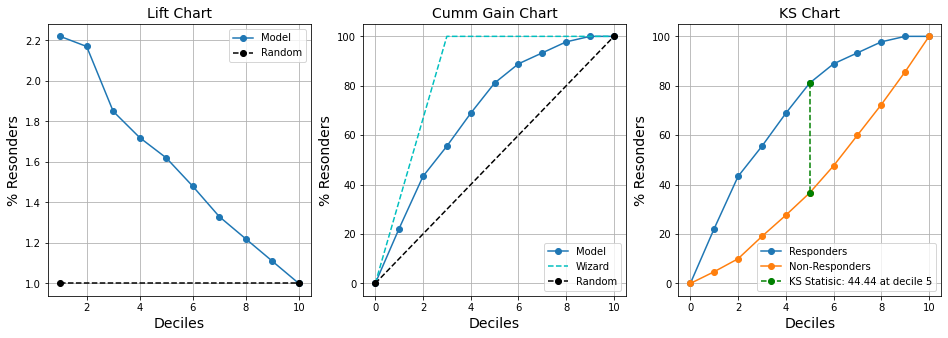

,decile,min_prob,max_prob,avg_prob,...,cum_resp_pct_wiz,cum_non_resp_pct,KS,Lift
0,1,0.483109,0.635936,0.531305,...,33.33,4.76,17.46,2.22
1,2,0.417891,0.479308,0.446350,...,66.67,10.00,33.33,2.17
2,3,0.378163,0.417341,0.397517,...,100.00,19.05,36.51,1.85
3,4,0.335987,0.377692,0.358269,...,100.00,27.62,41.27,1.72
4,5,0.302718,0.334963,0.317898,...,100.00,36.67,44.44,1.62
5,6,0.250947,0.302596,0.278193,...,100.00,47.62,41.27,1.48
6,7,0.215327,0.250262,0.231601,...,100.00,60.00,33.33,1.33
7,8,0.183897,0.215109,0.202518,...,100.00,72.38,25.40,1.22
8,9,0.140331,0.183141,0.157041,...,100.00,85.71,14.29,1.11
9,10,0.061664,0.139689,0.108946,...,100.00,100.00,0.00,1.00


In [51]:
Rank_Order(test_result['prob'],test_result['target'])

### Adding labels to the encoded data from the data dictionary provided

In [52]:
d1 = {'A11' : '... < 0 DM','A12' : '0 <= ... < 200 DM',
      'A13' : '... >= 200 DM / salary assignments for at least 1 year','A14' : 'no checking account'}

d3 = {'A30' : 'no credits taken/ all credits paid back duly',
'A31' : 'all credits at this bank paid back duly',
'A32' : 'existing credits paid back duly till now',
'A33' : 'delay in paying off in the past',
'A34' : 'critical account/ other credits existing (not at this bank)'}

d4 = {'A40' : 'car (new)',
'A41' : 'car (used)',
'A42' : 'furniture/equipment',
'A43' : 'radio/television',
'A44' : 'domestic appliances',
'A45' : 'repairs',
'A46' : 'education',
'A47' : '(vacation - does not exist?)',
'A48' : 'retraining',
'A49' : 'business',
'A410' : 'others'}

d6 = {'A61' : '... < 100 DM',
'A62' : '100 <= ... < 500 DM',
'A63' : '500 <= ... < 1000 DM',
'A64' : '.. >= 1000 DM',
'A65' : 'unknown/ no savings account'}

d7 = {'A71' : 'unemployed',
'A72' : '... < 1 year',
'A73' : '1 <= ... < 4 years',
'A74' : '4 <= ... < 7 years',
'A75' : '.. >= 7 years'}

d9 = {'A91' : 'male : divorced/separated',
'A92' : 'female : divorced/separated/married',
'A93' : 'male : single',
'A94' : 'male : married/widowed',
'A95' : 'female : single'}

d10 = {'A101' : 'none',
'A102' : 'co-applicant',
'A103' : 'guarantor'}

d12 = {'A121' : 'real estate',
'A122' : 'if not A121 : building society savings agreement/ life insurance',
'A123' : 'if not A121/A122 : car or other, not in attribute 6',
'A124' : 'unknown / no property'}

d14 = {'A141' : 'bank',
'A142' : 'stores',
'A143' : 'none'}

d15 = {'A151' : 'rent',
'A152' : 'own',
'A153' : 'for free'}

d17 = {'A171' : 'unemployed/ unskilled - non-resident',
'A172' : 'unskilled - resident',
'A173' : 'skilled employee / official',
'A174' : 'management/ self-employed/highly qualified employee/ officer'}

d19 = {'A191' : 'none',
'A192' : 'yes, registered under the customers name'}

d20 = {'A201' : 'yes',
'A202' : 'no'}

df_viz = df.copy(deep=True)

df_viz.replace({'status_of_exst_checking_acnt': d1, 'credit_hist': d3, 'purpose':d4,
               'savings_acnt': d6, 'employment_since': d7, 'status': d9, 'oth_gurantors': d10,
               'property': d12, 'oth_plans': d14, 'housing': d15, 'job': d17, 'tele': d19, 'foreign_wrkr': d20, 
               'target': {1: 'good', 2: 'bad'}}, inplace=True)

In [53]:
train_result.prob.min()

0.059182450157678354

In [54]:
train_result[train_result['prob']==0.059182450157678354]

,target,prob
368,0,0.059182


In [55]:
X_train[368]

array([  24, 2197,    4,    4,   43,    2,    2,    0,    0,    0,    1,
          0,    0,    0,    0,    1,    0,    1,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    1,    0,    0,    0,    1,    0,    1,    0,    0,    0,
          0,    1,    0,    0,    0,    1,    0,    1,    0,    0,    0,
          1,    0,    0,    1,    1,    0])

In [57]:
df_viz[(df_viz['duration_mth']== 24) & (df_viz['credit_amnt']==2197)]

,status_of_exst_checking_acnt,duration_mth,credit_hist,purpose,...,num_liable,tele,foreign_wrkr,target
406,no checking account,24,critical account/ other credits existing (not ...,car (used),...,2,"yes, registered under the customers name",yes,0


In [58]:
df_viz.iloc[406,:]

status_of_exst_checking_acnt                                  no checking account
duration_mth                                                                   24
credit_hist                     critical account/ other credits existing (not ...
purpose                                                                car (used)
credit_amnt                                                                  2197
savings_acnt                                          unknown/ no savings account
employment_since                                               4 <= ... < 7 years
instal_rate                                                                     4
status                                                              male : single
oth_gurantors                                                                none
prsnt_res_since                                                                 4
property                        if not A121/A122 : car or other, not in attrib...
age             

#### Above is an example for certain set of features which is of the “best” credit-worthy person. 